In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('attacks(1).csv')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 23,Unnamed: 24
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN


In [4]:
df = df.drop(axis = 1, columns = ['Unnamed: 24', 'Unnamed: 23', 'href', 'href formula', 'pdf', 'original order',
                                  'Investigator or Source', 'Time',  'Injury'
                                  ,'Date','Location', 'Name', 'Case Number', 'Age', 'Case Number'])

In [5]:
df = df.drop(columns = ['Case Number.1', 'Case Number.2'])


In [6]:
df.head()

,Year,Type,Country,Area,Activity,Sex,4,Fatal (Y/N),Species
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Clean Sex

df.rename(columns={'Sex ': 'Sex'}, inplace=True)
df.columns = df.columns.str.strip()

df['Sex'] = df['Sex'].str.replace('N', 'M')
df['Sex'] = df['Sex'].str.strip()
df['Sex'] = df['Sex'].fillna('Unknown')
df['Sex'] = df['Sex'].str.replace('lli', 'Unknown')
df['Sex'] = df['Sex'].str.replace('.', 'Unknown')
set(df['Sex'])

{'F', 'M', 'Unknown'}

In [8]:
#Clean Type

df['Type'] = df['Type'].str.strip()
df['Type'] = df['Type'].str.replace('Boating','Boat')
df['Type'] = df['Type'].str.replace('Boatomg','Boat')
df['Type'] = df['Type'].str.replace('Invalid','Unknown')

print(set(df['Type']))

{nan, 'Unprovoked', 'Unknown', 'Provoked', 'Questionable', 'Sea Disaster', 'Boat'}


In [9]:
#Clean Country

df['Country'].fillna('Unknown', inplace=True)
df['Country'] = df['Country'].str.strip().str.upper()
print(set(df['Country']))

{'CHINA', 'VENEZUELA', 'NORTH ATLANTIC OCEAN', 'CAPE VERDE', 'MARTINIQUE', 'SEYCHELLES', 'REUNION', 'TRINIDAD &\xa0TOBAGO', 'BELIZE', 'COSTA RICA', 'MARSHALL ISLANDS', 'NORTH PACIFIC OCEAN', 'GRENADA', 'AZORES', 'UNKNOWN', 'PHILIPPINES', 'INDONESIA', 'MALTA', 'CROATIA', 'SOLOMON ISLANDS', 'SOUTHWEST PACIFIC OCEAN', 'ECUADOR', 'LEBANON', 'TAIWAN', 'TUNISIA', 'SLOVENIA', 'SOUTH\xa0KOREA', 'ICELAND', 'THAILAND', 'KIRIBATI', 'DOMINICAN REPUBLIC', 'SPAIN', 'NAMIBIA', 'PALAU', 'IRAQ', 'GREECE', 'ADMIRALTY ISLANDS', 'SENEGAL', 'EGYPT / ISRAEL', 'FALKLAND ISLANDS', 'IRAN / IRAQ', 'MONTENEGRO', 'GUYANA', 'BRITISH NEW GUINEA', 'PERSIAN GULF', 'CHILE', 'TURKEY', 'SRI\xa0LANKA', 'CENTRAL PACIFIC', 'BAHAMAS', 'MALDIVES', 'USA', 'MAURITIUS', 'URUGUAY', 'SOUTH ATLANTIC OCEAN', 'CARIBBEAN SEA', 'NIGERIA', 'TASMAN SEA', 'ATLANTIC OCEAN', 'JAMAICA', 'VIETNAM', 'NETHERLANDS ANTILLES', 'HONDURAS', 'UNITED ARAB\xa0EMIRATES', 'MID-PACIFC OCEAN', 'OCEAN', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'AUSTRALIA',

In [10]:
#Clean Years
df.dropna(subset = ["Year"], inplace=True)
df['Year'].astype('int64')

df.dtypes

Year           float64
Type            object
Country         object
Area            object
Activity        object
Sex             object
4              float64
Fatal (Y/N)     object
Species         object
dtype: object

In [11]:
#Clean Area

df = df.drop(columns = ['Area'])

In [12]:

df = df.dropna(how='any',axis=0) 
df.head()


,Year,Type,Country,Activity,Sex,4,Fatal (Y/N),Species
7,2018.0,Boat,USA,Paddling,F,0.0,N,White shark
10,2018.0,Unprovoked,AUSTRALIA,Surfing,M,3.0,N,2 m shark
11,2018.0,Provoked,MEXICO,Free diving,M,2.0,N,"Tiger shark, 3m"
13,2018.0,Unprovoked,USA,Fishing,M,3.0,N,"Lemon shark, 3'"
14,2018.0,Unprovoked,USA,Walking,M,7.0,N,"Bull shark, 6'"


In [13]:
#CLean Fatal
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna('U')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('n', 'N')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('#VALUE!', 'U')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('F', 'Y')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('UNKNOWN', 'U')
df.rename(columns={'Fatal (Y/N)': 'Fatal (Y/N/U)'}, inplace=True)
print(set(df['Fatal (Y/N/U)']))

{'U', 'M', 'N'}


In [14]:
df.rename(columns={'4': 'Severity'}, inplace=True)

In [15]:
#Encoding

one_hot_encoded_data = pd.get_dummies(df, columns = ['Country', 'Sex','Activity','Type'])
one_hot_encoded_data.head()

,Year,Severity,Fatal (Y/N/U),Species,Country_ANGOLA,Country_ARGENTINA,Country_ATLANTIC OCEAN,Country_AUSTRALIA,Country_AZORES,Country_BAHAMAS,...,Activity_Wooden fishing boat,Activity_Working prawn net,Activity_Yacht race,Activity_ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover,Type_Boat,Type_Provoked,Type_Questionable,Type_Sea Disaster,Type_Unknown,Type_Unprovoked
7,2018.0,0.0,N,White shark,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,2018.0,3.0,N,2 m shark,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,2018.0,2.0,N,"Tiger shark, 3m",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,2018.0,3.0,N,"Lemon shark, 3'",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,2018.0,7.0,N,"Bull shark, 6'",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#df.drop(df.index[(df['Fatal (Y/N/U)'] == "2017")],axis=0,inplace=True)
#df.drop(df.index[(df['Fatal (Y/N/U)'] == "M")],axis=0,inplace=True)
#df.drop(df.index[(df['Fatal (Y/N/U)'] == "U")],axis=0,inplace=True)
# Import label encoder 
#from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
#label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Fatal'. 
#one_hot_encoded_data['Fatal (Y/N/U)']= label_encoder.fit_transform(one_hot_encoded_data['Fatal (Y/N/U)']) 
#one_hot_encoded_data.head()

In [16]:
one_hot_encoded_data= one_hot_encoded_data.drop(columns = ['Species'])


In [18]:
one_hot_encoded_data.head()


,Year,Severity,Fatal (Y/N/U),Country_ANGOLA,Country_ARGENTINA,Country_ATLANTIC OCEAN,Country_AUSTRALIA,Country_AZORES,Country_BAHAMAS,Country_BELIZE,...,Activity_Wooden fishing boat,Activity_Working prawn net,Activity_Yacht race,Activity_ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover,Type_Boat,Type_Provoked,Type_Questionable,Type_Sea Disaster,Type_Unknown,Type_Unprovoked
7,2018.0,0.0,N,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,2018.0,3.0,N,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,2018.0,2.0,N,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,2018.0,3.0,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,2018.0,7.0,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
X = one_hot_encoded_data.iloc[:,[0,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699]].values
Y = one_hot_encoded_data.iloc[:,[1]].values

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Logistic Regression dont run
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred)

from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [61]:
#SVR 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
np.random.seed(0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=1) 
principalComponents = pca.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1) 
svr_lin = SVR(kernel='linear', C=0.1) 
svr_poly = SVR(kernel='poly', C=0.1, degree=2) 
y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test) 
y_lin = svr_lin.fit(X_train, Y_train).predict(X_test) 
y_poly = svr_poly.fit(X_train, Y_train).predict(X_test) 

svr = SVR().fit(X_test, y_rbf)

loss_rbf = np.abs(Y_test-y_rbf.reshape(Y_test.size,1))
tloss_rbf = np.sum(loss_rbf)
print("Total loss for rbf: ", tloss_rbf)
scorerbf = svr.score(X_test,y_rbf)
print("R-squared:", scorerbf)
print("MSE:", mean_squared_error(Y_test, y_rbf))

loss_lin = np.abs(Y_test-y_lin.reshape(Y_test.size,1))
tloss_lin = np.sum(loss_lin)
print("Total loss for linear: ", tloss_lin)
scorelin = svr.score(X_test,y_lin)
print("R-squared:", scorelin)
print("MSE:", mean_squared_error(Y_test, y_lin))

loss_poly = np.abs(Y_test-y_poly.reshape(Y_test.size,1))
tloss_poly = np.sum(loss_poly)
print("Total loss for polynomial: ", tloss_poly)
scorepoly = svr.score(X_test,y_poly)
print("R-squared:", scorepoly)
print("MSE:", mean_squared_error(Y_test, y_poly))


Total loss for rbf:  1252.3418774605095
R-squared: 0.5613946762798383
MSE: 10.01661445277461
Total loss for linear:  1128.8286363219327
R-squared: 0.12266394928869462
MSE: 9.145005960755089
Total loss for polynomial:  1277.928679842752
R-squared: -27.646834105146027
MSE: 9.879749810270546


ValueError: x and y must be the same size

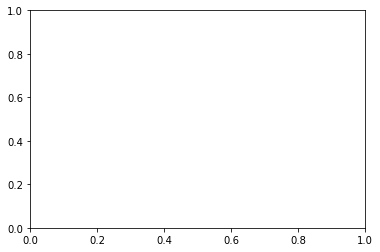

In [62]:
plt.scatter(X_test, Y_test, color='darkorange', label='data') 
lw=2
plt.plot(X_test, y_rbf, color='navy', lw=lw, label='RBF model') 
#plt.plot(X_test, y_lin, color='c', lw=lw, label='Linear model') 
#plt.plot(X_test, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model') 
plt.xlabel('inputs') 
plt.ylabel('severity') 
plt.title('Support Vector Regression') 
plt.legend() 
plt.show() 